# $$\text{House Pricing - Kaggle}$$

Template

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer, KNNImputer
import category_encoders as ce
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.decomposition import PCA,KernelPCA

In [2]:
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
import xgboost as xgb

# $\text{1. Dataset & Visualization}$


In [4]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [5]:
len(df_train)

1460

In [6]:
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [7]:
df_train.pop('Id')
df_test.pop('Id')

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [8]:
len(df_test)

1459

In [9]:
df_test.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [10]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
df_train.shape

(1460, 80)

In [12]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## $\text{Overall Condition}$

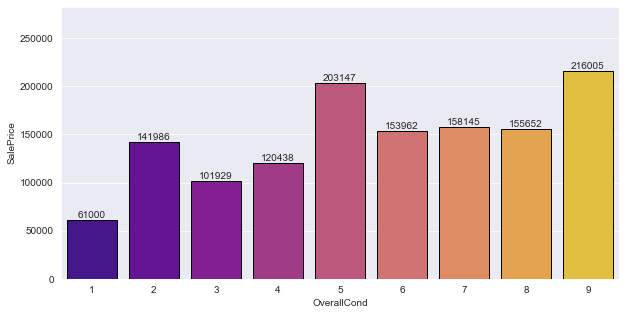

In [13]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = df_train["OverallCond"], y = df_train["SalePrice"], edgecolor = 'k', palette = 'plasma', estimator = np.mean, errwidth = 0)
ax.bar_label(ax.containers[0])
plt.show()

## $\text{Year Built | Year Remodelled}$

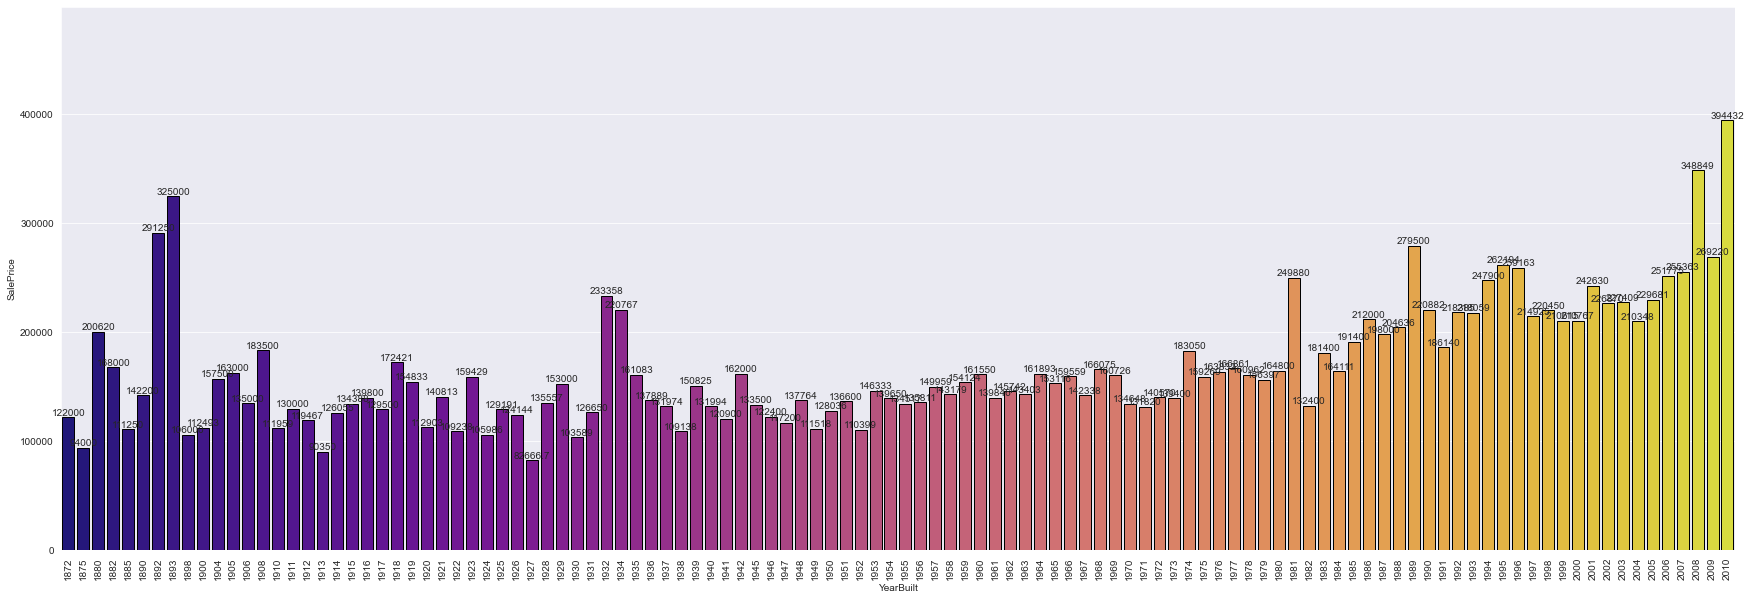

In [14]:
plt.figure(figsize = (30,10))
plt.xticks(rotation = 90)
ax = sns.barplot(x = df_train["YearBuilt"], y = df_train["SalePrice"], edgecolor = 'k', palette = 'plasma',estimator = np.mean, errwidth = 0)
ax.bar_label(ax.containers[0])
plt.show()

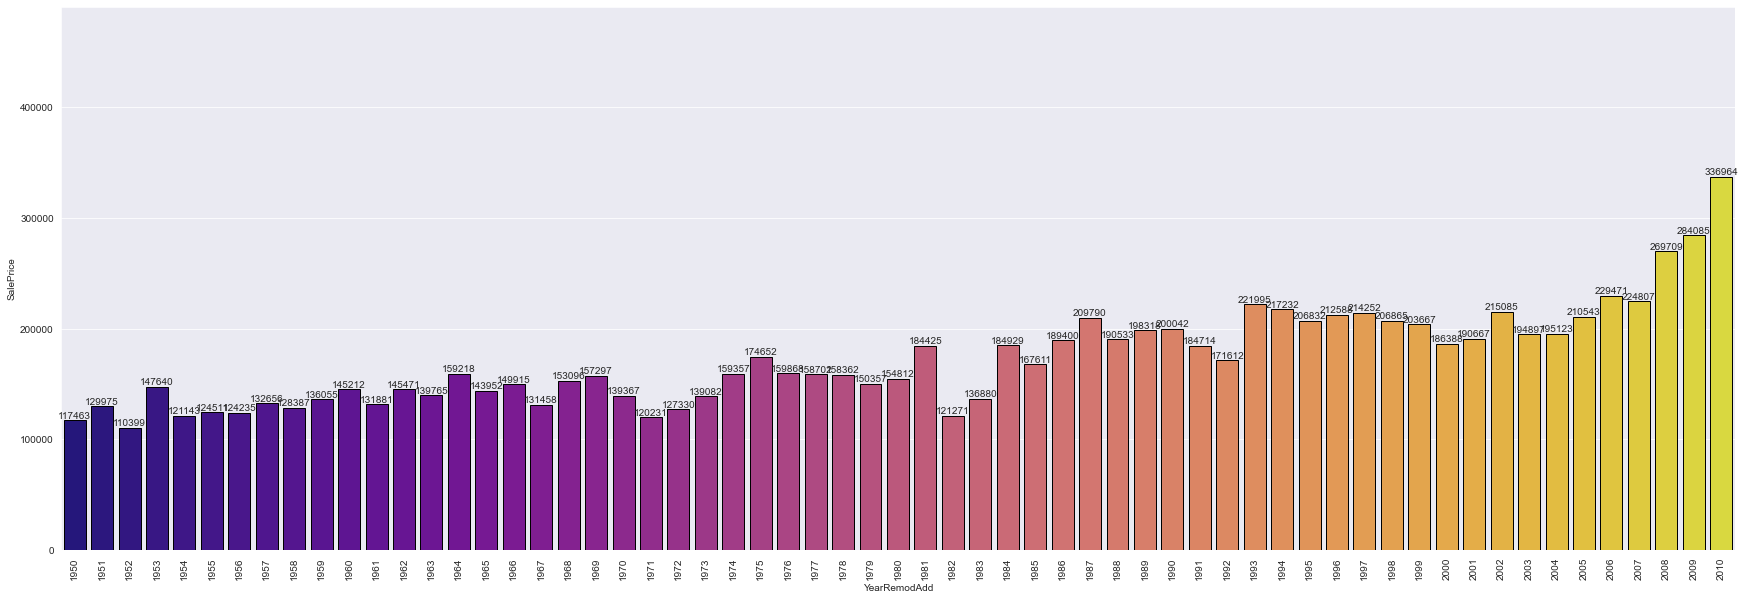

In [15]:
plt.figure(figsize = (30,10))
plt.xticks(rotation = 90)
ax = sns.barplot(x = df_train["YearRemodAdd"], y = df_train["SalePrice"], edgecolor = 'k', palette = 'plasma',estimator = np.mean, errwidth = 0)
ax.bar_label(ax.containers[0])
plt.show()

## $\text{LotFrontage | LotArea}$

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

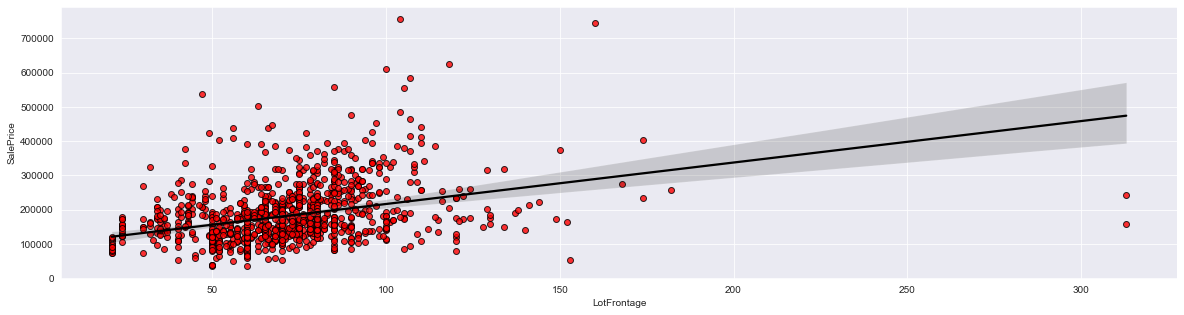

In [16]:
plt.figure(figsize = (20,5))
sns.regplot(x = df_train["LotFrontage"], y = df_train["SalePrice"], scatter_kws = {'color':'r','edgecolor':'k'}, line_kws = {'color':'k'})

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

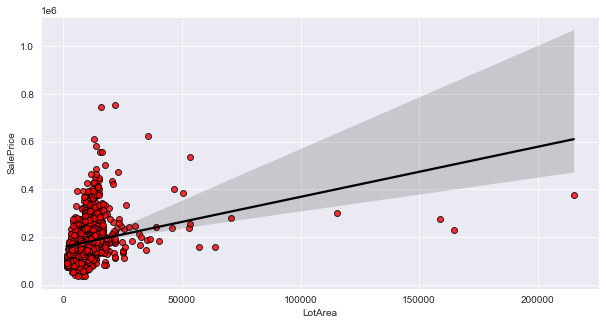

In [17]:
plt.figure(figsize = (10,5))
sns.regplot(x = df_train["LotArea"], y = df_train["SalePrice"], scatter_kws = {'color':'r','edgecolor':'k'}, line_kws = {'color':'k'})

# $\text{2. Pre-processing}$

## $\text{2.1. Feature Engineering}$

Remove most 0 features: Most examples have the value as 0  for the features such as `3SsnPorch`,`EnclosedPorch`,`ScreenPorch`,`PoolArea`,`MiscFeature`,`MiscVal`,`MoSold`,`YrSold`,`LowQualFinSF` and thus can be dropped

In [18]:
len(df_train.columns)

80

In [19]:
df_train.drop(['3SsnPorch','EnclosedPorch','ScreenPorch','PoolArea','MiscFeature','MiscVal','MoSold','YrSold','LowQualFinSF'], axis = 1, inplace = True)
df_test.drop(['3SsnPorch','EnclosedPorch','ScreenPorch','PoolArea','MiscFeature','MiscVal','MoSold','YrSold','LowQualFinSF'], axis = 1, inplace = True)

In [20]:
len(df_train.columns)

71

In [21]:
df_train.dtypes.value_counts()

object     42
int64      26
float64     3
dtype: int64

* Seperate categorical columns in a seperate list: `cat_columns`

In [22]:
nominal_columns = [x for x in df_train.select_dtypes('object').columns]

In [23]:
np.asarray(nominal_columns).T

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'SaleType', 'SaleCondition'], dtype='<U13')

* Seperate `int` columns in a seperate list: `int_columns`. This list will have both __nominal__ data feature and __ordinal__ data feature, both in the form of integers

In [24]:
int_columns = [j for j in df_train.select_dtypes('int64').columns]

In [25]:
np.asarray(int_columns).T

array(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='<U12')

* Extract columns that are __ordinal__

In [26]:
ordinal_columns = [x for x in int_columns if x in ('MSSubClass','OverallQual','OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                                               'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars')]

In [27]:
np.asarray(ordinal_columns)

array(['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars'],
      dtype='<U12')

* Extract columns that are __numerical__

In [28]:
num_columns = [x for x in int_columns if x not in ('MSSubClass','OverallQual','OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                                               'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars')]

In [29]:
np.asarray(num_columns)

array(['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='<U12')

In [30]:
num_columns.remove('SalePrice')

* Extract columns that are of type `float`

In [31]:
float_columns = [x for x in df_train.select_dtypes('float').columns]

In [32]:
np.asarray(float_columns)

array(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='<U11')

Cross-check if all the columns are properly seperated

In [33]:
df_train.dtypes.value_counts()

object     42
int64      26
float64     3
dtype: int64

In [34]:
assert ( len(nominal_columns) + (len(ordinal_columns) + len(num_columns)) + len(float_columns) ) == len(df_train.columns) - 1

In [35]:
len(nominal_columns) + len(ordinal_columns) + len(num_columns) + len(float_columns)

70

-1 since we removed the `SalePrice` target feature

## $\text{2.2. NaN Handling}$

Having 5 list of columns - 
* `nominal_columns` - Features holding categorical data of type `object` which are unranked/nominal
* `int_columns` - Features holding data of type `int64`
    - `ordinal_columns` - Features holding categorical data of type `int64` which are ranked/ordinal
    - `num_columns` - Features holding numerical data of type `int64` 
* `float_columns` - Features holding categorical data of type `float64`

Need to merge `num_columns`, `float_columns` since both are numerical and `nominal_columns`,`ordinal_columns` since both are categorical

In [36]:
numerical_columns = num_columns + float_columns
categorical_columns = nominal_columns + ordinal_columns

In [37]:
np.asarray(categorical_columns)

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual',
       'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars'], dtype='<U13')

In [38]:
np.asarray(numerical_columns)

array(['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'LotFrontage',
       'MasVnrArea', 'GarageYrBlt'], dtype='<U12')

For categorical data, fill the NaN with their modes for numerical data, interpolate

In [39]:
for i,j in enumerate(np.asarray(df_train.columns)):
    if(j in categorical_columns):
        df_train[j].fillna(df_train[j].value_counts().idxmax(), inplace = True)
    elif(j in numerical_columns):
        df_train[j].interpolate(inplace = True)
    else:
        print(j)

SalePrice


In [40]:
[df_train.columns[i] for i,j in enumerate(df_train) if df_train[j].isna().any()==True]

[]

Empty, means no NaNs present in dataset. 

Impute NaN's in `df_test` as well

In [41]:
for i,j in enumerate(np.asarray(df_test.columns)):
    if(j in categorical_columns):
        df_test[j].fillna(df_test[j].value_counts().idxmax(), inplace = True)
    elif(j in numerical_columns):
        df_test[j].interpolate(inplace = True)
    else:
        print(j)

In [42]:
[df_test.columns[i] for i,j in enumerate(df_test) if df_test[j].isna().any()==True]

[]

## $\text{2.3. Feature Selection}$

For numerical features, __Backward Feature Selection__

In [43]:
X_train_num = df_train[numerical_columns]
X_train_cat = df_train[categorical_columns]
y_train = df_train['SalePrice']

X_test_num = df_test[numerical_columns]
X_test_cat = df_test[categorical_columns]

In [44]:
# import warnings
# warnings.filterwarnings("ignore")
# from sklearn.feature_selection import SequentialFeatureSelector

# model = xgb.XGBRegressor()
# sf = SequentialFeatureSelector(model, scoring='accuracy', direction = 'backward')
# sf.fit(X_train_num,y_train)

# best_num_features = list(sf.get_feature_names_out())
# best_num_features

In [45]:
best_num_features = ['2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','LotFrontage','MasVnrArea','GarageYrBlt']

In [46]:
X_train_num.shape

(1460, 16)

In [47]:
X_train_num = X_train_num[best_num_features]
X_test_num = X_test_num[best_num_features]

In [48]:
X_train_num.shape

(1460, 8)

Cast each `object` dtype feature to `category` and each`int` feature to ordered `category`

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
for i,j in enumerate(X_train_cat.columns):
    if(X_train_cat[j].dtypes=='object'):
        X_train_cat[j] = X_train_cat[j].astype('category')

for i,j in enumerate(X_test_cat.columns):
    if(X_test_cat[j].dtypes=='object'):
        X_test_cat[j] = X_test_cat[j].astype('category')

In [51]:
X_train_orig = pd.concat([X_train_num, X_train_cat], axis = 1)
X_test_orig = pd.concat([X_test_num, X_test_cat], axis = 1)

---
---

Hard ordered/unordered encoding. Comment previous encoding runtime if using this.

In [52]:
# from pandas.api.types import CategoricalDtype

# for i,j in enumerate(X_train_cat.columns):
#     if(X_train_cat[j].dtypes=='object'):
#         cat_dtype = CategoricalDtype(X_train_cat[j].unique())
#         X_train_cat[j] = X_train_cat[j].astype(cat_dtype)
#     else:
#         int_dtype = CategoricalDtype(np.sort(X_train_cat[j].unique()), ordered = True)
#         X_train_cat[j] = X_train_cat[j].astype(int_dtype)

In [53]:
# X_train_cat['MSZoning'].dtypes

In [54]:
# X_train_cat['Fireplaces'].dtypes

## $\text{2.4. Feature Encoding}$

In [55]:
# from category_encoders.cat_boost import CatBoostEncoder as ce

In [56]:
# cbe = ce(return_df = True)
# X_train_cbe = cbe.fit_transform(X_train_cat, y_train)

In [57]:
# X_test_cbe = cbe.transform(X_test_cat)

Construct final dataset

In [58]:
# X_train_final = pd.concat([X_train_cbe, X_train_num], axis = 1)
# X_test_final = pd.concat([X_test_cbe, X_test_num], axis = 1)

In [59]:
# X_train_final.head(3)

---
---

## $\text{2.5. Feature Transformation & Dimesionality Reduction}$

Some scaling technique if not using random forest algos

In [60]:
# qt = QuantileTransformer()
# X_train_trans = qt.fit_transform(X_train_final,y_train)
# X_train_trans

In [61]:
# X_test_trans = qt.transform(X_test_final)

In [62]:
# X_train_trans.shape

Some dimensionality reduction method if not using random forest algos

In [63]:
# from sklearn.random_projection import SparseRandomProjection
# rng = np.random.RandomState(42)
# X = rng.rand(25, 3000)

# srp = SparseRandomProjection()
# X_train_trans = srp.fit_transform(X_train_orig, y_train)

---
---

# $\text{4. Model Build}$

## $\text{4.0. Train-CV-Test Split}$ 

In [64]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train_orig, y_train, test_size = 0.3)

X_train.reset_index(inplace = True, drop = True)
X_cv.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)
y_cv.reset_index(inplace = True, drop = True)

X_test = X_test_orig

## $\text{4.1. XGBoost}$ 

In [65]:
dtrain = xgb.DMatrix(data = X_train, label = y_train, enable_categorical = True)
dcv = xgb.DMatrix(data = X_cv, label = y_cv, enable_categorical = True)
dtest = xgb.DMatrix(data = X_test, enable_categorical = True)

In [66]:
evallist = [(dtrain,'dtrain'),(dcv,'eval')]

In [67]:
param = {'num_parallel_tree' : 5, 'max_depth' : 30, 'subsample':0.1, 'min_child_weight': 30, 'colsample_bytree':1,
         'objective' : 'reg:squarederror'}

bst = xgb.train(param, dtrain, 50, evallist)

[0]	dtrain-rmse:146806.42963	eval-rmse:147202.41352
[1]	dtrain-rmse:110950.80491	eval-rmse:112466.25231
[2]	dtrain-rmse:85672.93978	eval-rmse:87984.84671
[3]	dtrain-rmse:70464.48156	eval-rmse:73349.22736
[4]	dtrain-rmse:61670.42534	eval-rmse:64892.08952
[5]	dtrain-rmse:54208.05330	eval-rmse:57782.68863
[6]	dtrain-rmse:50374.20416	eval-rmse:54056.58162
[7]	dtrain-rmse:47531.86126	eval-rmse:51157.10790
[8]	dtrain-rmse:46021.78522	eval-rmse:49576.16658
[9]	dtrain-rmse:44392.43468	eval-rmse:47843.26763
[10]	dtrain-rmse:43440.88969	eval-rmse:46783.57373
[11]	dtrain-rmse:42545.07339	eval-rmse:45731.72095
[12]	dtrain-rmse:42118.82593	eval-rmse:45207.66178
[13]	dtrain-rmse:41719.31090	eval-rmse:44812.53409
[14]	dtrain-rmse:41348.58461	eval-rmse:44352.13613
[15]	dtrain-rmse:40862.37899	eval-rmse:43866.05801
[16]	dtrain-rmse:40672.90584	eval-rmse:43788.25910
[17]	dtrain-rmse:40290.65121	eval-rmse:43386.20528
[18]	dtrain-rmse:40204.90245	eval-rmse:43196.82815
[19]	dtrain-rmse:39938.16895	eval-rms

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

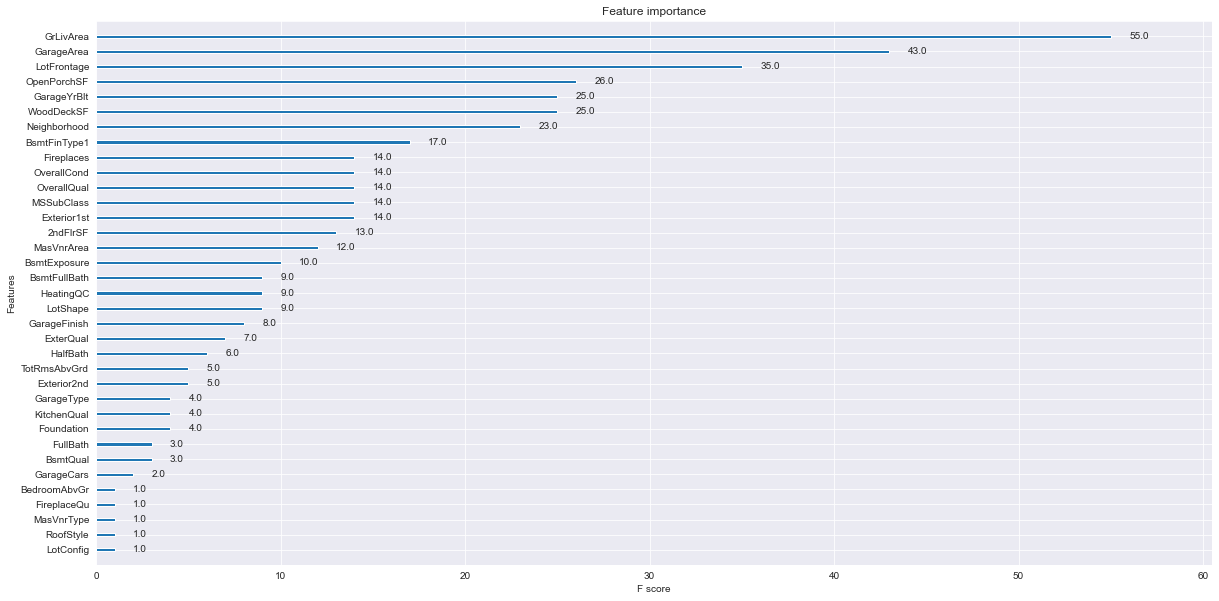

In [68]:
fig, ax = plt.subplots(1,1,figsize = (20,10))
xgb.plot_importance(bst, ax = ax)

In [69]:
impf = ['GrLivArea','LotFrontage','Neighborhood','OpenPorchSF','GarageArea',
        'GarageYrBlt','BsmtFinType1','WoodDeckSF','MSSubClass','Fireplaces',
        'MasVnrArea','LotShape','OverallCond','OverallQual','Exterior1st']

In [70]:
X_train_impf = X_train[impf]
X_cv_impf = X_cv[impf]
X_test_impf = X_test[impf]

In [71]:
X_train_impf.columns

Index(['GrLivArea', 'LotFrontage', 'Neighborhood', 'OpenPorchSF', 'GarageArea',
       'GarageYrBlt', 'BsmtFinType1', 'WoodDeckSF', 'MSSubClass', 'Fireplaces',
       'MasVnrArea', 'LotShape', 'OverallCond', 'OverallQual', 'Exterior1st'],
      dtype='object')

In [72]:
dtrain_impf = xgb.DMatrix(data = X_train_impf, label = y_train, enable_categorical = True)
dcv_impf = xgb.DMatrix(data = X_cv_impf, label = y_cv, enable_categorical = True)
dtest_impf = xgb.DMatrix(data = X_test_impf, enable_categorical = True)

In [73]:
evallist_impf = [(dtrain_impf,'dtrain'),(dcv_impf,'eval')]

In [74]:
param = {'num_parallel_tree' : 8, 'max_depth' : 20, 'subsample':0.9, 'min_child_weight': 8, 'colsample_bytree':0.6,
         'objective' : 'reg:squarederror','eta':1.2 ,'eval_metric':'rmse'}
bst_bf = xgb.train(param, dtrain_impf, 120, evallist_impf)

[0]	dtrain-rmse:48106.72455	eval-rmse:47803.86193
[1]	dtrain-rmse:25533.90434	eval-rmse:32113.78559
[2]	dtrain-rmse:19175.85088	eval-rmse:31293.35242
[3]	dtrain-rmse:16022.53646	eval-rmse:31021.60536
[4]	dtrain-rmse:13316.41005	eval-rmse:30833.32469
[5]	dtrain-rmse:11715.17515	eval-rmse:31026.32771
[6]	dtrain-rmse:10182.26571	eval-rmse:31038.17087
[7]	dtrain-rmse:9108.39062	eval-rmse:31169.27025
[8]	dtrain-rmse:8006.15045	eval-rmse:31239.21522
[9]	dtrain-rmse:7108.90076	eval-rmse:31406.22944
[10]	dtrain-rmse:6475.21100	eval-rmse:31443.48702
[11]	dtrain-rmse:5733.18200	eval-rmse:31378.49611
[12]	dtrain-rmse:5138.30050	eval-rmse:31519.43390
[13]	dtrain-rmse:4609.82260	eval-rmse:31552.90653
[14]	dtrain-rmse:4186.78676	eval-rmse:31619.84146
[15]	dtrain-rmse:3816.16718	eval-rmse:31593.72107
[16]	dtrain-rmse:3472.26024	eval-rmse:31671.08100
[17]	dtrain-rmse:3127.09439	eval-rmse:31697.68978
[18]	dtrain-rmse:2878.84735	eval-rmse:31805.67875
[19]	dtrain-rmse:2610.20976	eval-rmse:31811.42153
[20

In [75]:
k = bst_bf.predict(dtest_impf)

In [76]:
k

array([148600.28, 147031.25, 188310.42, ..., 193790.08, 101510.32,
       208138.27], dtype=float32)

In [77]:
ss = pd.read_csv("sample_submission.csv")

In [78]:
submit = ss.copy()

In [79]:
submit.columns

Index(['Id', 'SalePrice'], dtype='object')

In [80]:
submit['SalePrice'] = k

In [81]:
submit.head(5)

,Id,SalePrice
0,1461,148600.281250
1,1462,147031.250000
2,1463,188310.421875
3,1464,181533.937500
4,1465,192056.843750


In [82]:
submit.to_csv("submit.csv", index = False, float_format = '%.6f')